# **Time Series Analysis** :
---


### Libraries :
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset :
---

In [2]:
sales = pd.read_csv("sales.csv")

In [3]:
sales.head()

,Month-Year,Sales
0,3-Jan-03,141
1,3-Feb-03,157
2,3-Mar-03,185
3,3-Apr-03,199
4,3-May-03,203


In [4]:
sales.tail()

,Month-Year,Sales
139,3-Aug-14,848
140,3-Sep-14,640
141,3-Oct-14,581
142,3-Nov-14,519
143,3-Dec-14,605


### Information and Changes in the Dataset :
---

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month-Year  144 non-null    object
 1   Sales       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
sales = sales.rename(columns = {"Month-Year" : "Month_Year"}, errors = 'raise')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month_Year  144 non-null    object
 1   Sales       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
sales["Month_Year"] = pd.to_datetime(sales["Month_Year"])

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month_Year  144 non-null    datetime64[ns]
 1   Sales       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
sales.head()

,Month_Year,Sales
0,2003-01-03,141
1,2003-02-03,157
2,2003-03-03,185
3,2003-04-03,199
4,2003-05-03,203


In [11]:
sales["Month_Year"].dt.year

0      2003
1      2003
2      2003
3      2003
4      2003
       ... 
139    2014
140    2014
141    2014
142    2014
143    2014
Name: Month_Year, Length: 144, dtype: int64

In [12]:
sales["Month_Year"].dt.month

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: Month_Year, Length: 144, dtype: int64

In [13]:
sales["Month_Year"].dt.day

0      3
1      3
2      3
3      3
4      3
      ..
139    3
140    3
141    3
142    3
143    3
Name: Month_Year, Length: 144, dtype: int64

In [14]:
sales["Month_Year"].dt.isocalendar().week

0       1
1       6
2      10
3      14
4      18
       ..
139    31
140    36
141    40
142    45
143    49
Name: week, Length: 144, dtype: UInt32

In [15]:
sales["Month_Year"].dt.quarter

0      1
1      1
2      1
3      2
4      2
      ..
139    3
140    3
141    4
142    4
143    4
Name: Month_Year, Length: 144, dtype: int64

In [16]:
sales[sales["Month_Year"] == '2003-02-03']

,Month_Year,Sales
1,2003-02-03,157


### Description of the dataset :
---

In [17]:
sales.describe().apply(lambda s : s.apply('{0:.2f}'.format))

,Sales
count,144.00
mean,389.69
std,171.50
min,138.00
25%,248.50
50%,369.00
75%,509.25
max,871.00


Here the mean > median => Positively Skewed

In [18]:
sales.describe(include = 'all',datetime_is_numeric=True)

,Month_Year,Sales
count,144,144.000000
mean,2008-12-17 17:00:00,389.694444
min,2003-01-03 00:00:00,138.000000
25%,2005-12-26 06:00:00,248.500000
50%,2008-12-18 12:00:00,369.000000
75%,2011-12-10 18:00:00,509.250000
max,2014-12-03 00:00:00,871.000000
std,NaN,171.500016


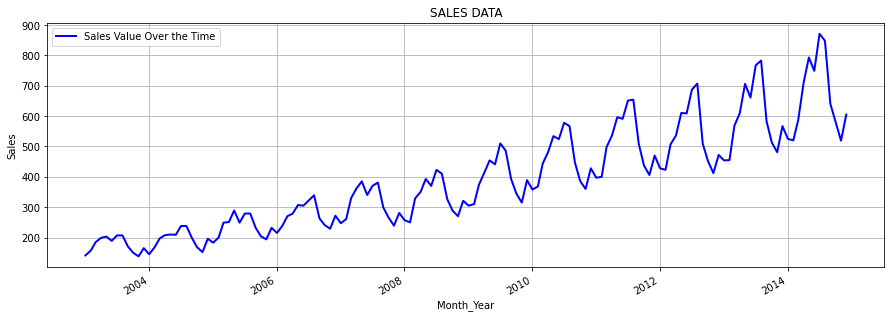

In [19]:
sales.plot(x = 'Month_Year', y ='Sales', label = 'Sales Value Over the Time', color = 'b', linewidth = 2, figsize = (15,5), grid = True)
plt.ylabel('Sales')
plt.legend(loc = 'upper left')
plt.title('SALES DATA')
plt.show()

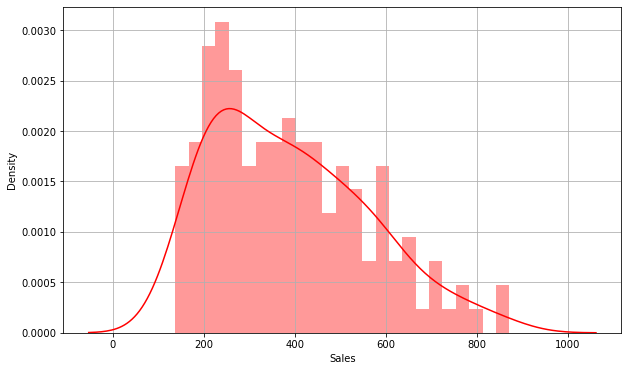

In [20]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
sns.distplot(sales['Sales'], bins = 25, color = 'r');
plt.grid()

### Determining Stationarity :
---

In [21]:
#import statsmodel

def time_func(series):
    # Applying Dickey-Fuller Test:
    from statsmodels.tsa.stattools import adfuller
    salesvalues = series.values
    
    # H0 : The time series is non-stationary:
    result = adfuller(salesvalues)
    print("The value of ADF Statistic is : %f" % result[0])
    print("The p-value is : %f" % result[1])
    print("Critical Values for different level of significance are :")
    for key, value in result[4].items():
        print('\t%s : %.3f' % (key, value))
    
    # Converting series to data frame:
    sales_data = series.to_frame()
    
    # Determining rolling statistics and standard deviation:
    salerolmean = sales_data['Sales'].rolling(12).mean()
    salerolstd = sales_data['Sales'].rolling(12).std()
    
    # Plot rolling statistics and standard deviation:
    plt.figure(figsize = (15,5))
    ax = plt.axes()
    plt.plot(series, color = 'blue', label = 'Original Series')
    plt.plot(salerolmean, color = 'black', label = 'Rolling Mean')
    plt.plot(salerolstd, color = 'red', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation of Series')
    plt.show()

The value of ADF Statistic is : 1.108825
The p-value is : 0.995291
Critical Values for different level of significance are :
	1% : -3.482
	5% : -2.884
	10% : -2.579


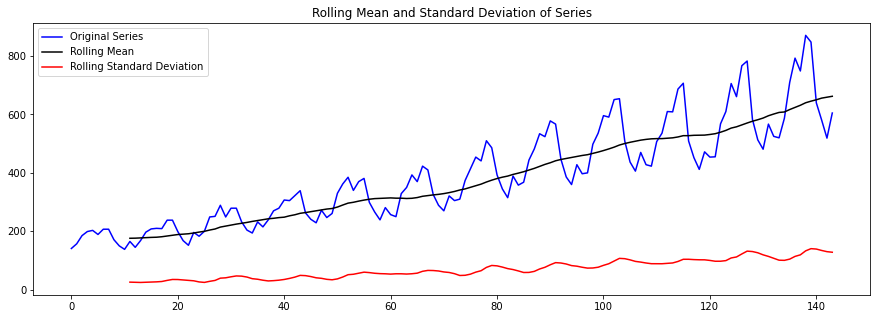

In [22]:
# Calling the function for ADF test :

time_func(sales.Sales)

Here the p-Value > 0.05 => we fail to reject the null hypothesis that the time series is non-stationary.

### Making Time Series Stationary : Adjusting Trend Using Smoothing :
---

##### **Simple Moving Average** :

- In this dataset as there is a strong positive trend, we shall use log transformation for making it stationary.

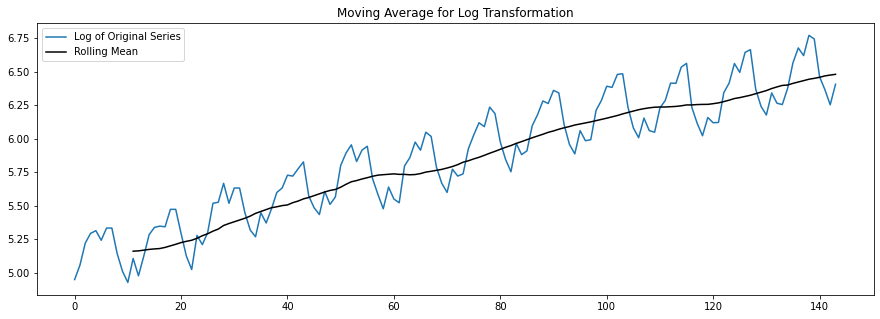

The First Five Records Using Moving Average Method: 
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sales, dtype: float64
The Last Five Records Using Moving Average Method: 
 139    0.293773
140    0.004587
141   -0.102503
142   -0.221686
143   -0.073768
Name: Sales, dtype: float64


In [23]:
# Performing log tranformation of the series:

sales_logseries = np.log(sales["Sales"])
sales_logdata = sales_logseries.to_frame()
sales_logdata = sales_logdata['Sales']
moving_avg = sales_logdata.rolling(12).mean()     ### Since we have 1 year interval, we consider MA of 12 or rolling(12)

# Display the plot of log series :

plt.figure(figsize = (15,5))
ax = plt.axes()
plt.plot(sales_logseries, label = 'Log of Original Series')
plt.plot(moving_avg, color = 'black', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.title("Moving Average for Log Transformation")
plt.show()

# Subtracting the MA Series from Original Series :

log_moving_avg_diff = sales_logseries - moving_avg
print("The First Five Records Using Moving Average Method: \n", log_moving_avg_diff.head())
print("The Last Five Records Using Moving Average Method: \n", log_moving_avg_diff.tail())
log_moving_avg_diff.dropna(inplace = True)

The value of ADF Statistic is : -3.043484
The p-value is : 0.031028
Critical Values for different level of significance are :
	1% : -3.487
	5% : -2.886
	10% : -2.580


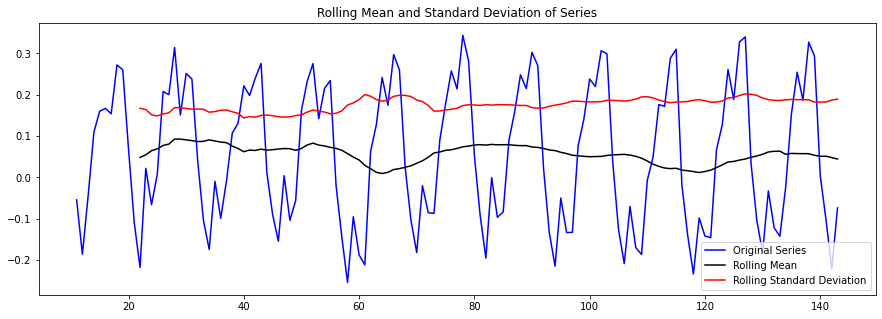

In [24]:
# Calling the function for ADF test :

time_func(log_moving_avg_diff)

Note : Here we notice that p-value < 0.05 => We reject the null hypothesis and the series is stationary at 95% confidence interval.

##### **Exponential Weighted Moving Average (EWMA)** :

- In some cases where the time period is complicated such as STOCK PRICE prediction, we use it. In the above case, we consider a specific time period(12 months for a year). This means that EWMA is used when we want a weighted average of existing time series values to make a short term prediction of future values. This can be done using ewma() function from pandas library. These models with seasonality or nondamped trend or both have two unit roots(that is, they need two levels of differencing to make them stationarity). All other models have one unit root.  

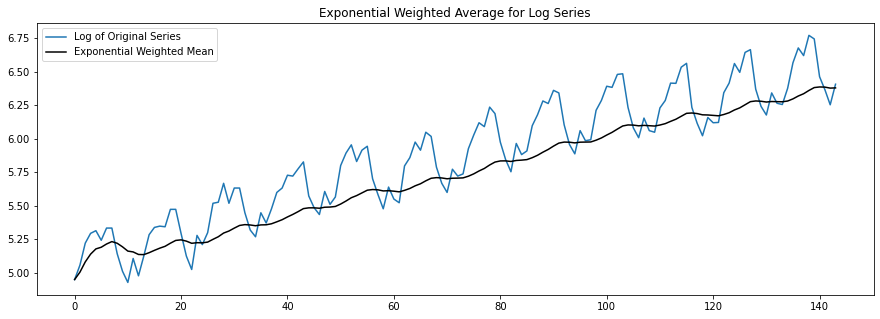

The First Five Records Using EWMA Method: 
 0    0.000000
1    0.052191
2    0.139998
3    0.155013
4    0.135778
Name: Sales, dtype: float64
The Last Five Records Using EWMA Method: 
 139    0.362598
140    0.076628
141   -0.018962
142   -0.124409
143    0.027293
Name: Sales, dtype: float64


In [25]:
# Performing EWMA :

ewma = pd.Series.ewm
expweighted_avg = ewma(sales_logdata, halflife = 12).mean()

# Displaying the plot for EWMA :

plt.figure(figsize = (15,5))
ax = plt.axes()
plt.plot(sales_logdata, label = 'Log of Original Series')
plt.plot(expweighted_avg, color = 'black', label = 'Exponential Weighted Mean')
plt.legend(loc = 'best')
plt.title("Exponential Weighted Average for Log Series")
plt.show()

# Subtracting the EWMA seris from original series :

log_ewma_diff = sales_logseries - expweighted_avg
print("The First Five Records Using EWMA Method: \n", log_ewma_diff.head())
print("The Last Five Records Using EWMA Method: \n", log_ewma_diff.tail())

For EWMA the values are non null. The parameter (halflife) is assumed 12. But it can be 30 or any number based on the domain. 

The value of ADF Statistic is : -4.035142
The p-value is : 0.001237
Critical Values for different level of significance are :
	1% : -3.482
	5% : -2.884
	10% : -2.579


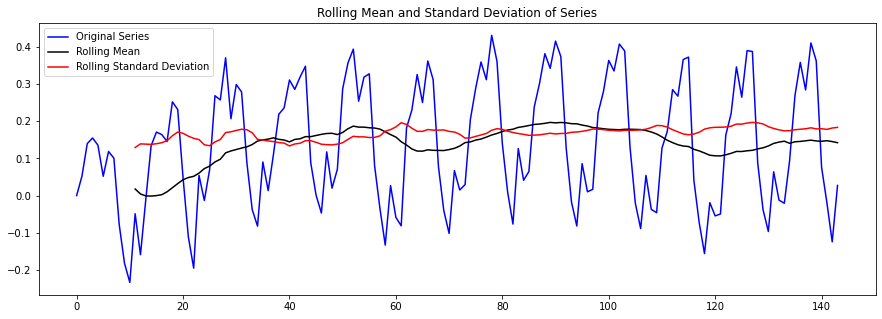

In [26]:
# Calling the function for ADF test:

time_func(log_ewma_diff)

We can observe that the series is stationary because rolling values have less variations in mean and standard deviation in magnitude. The p-value < 0.01, hence we are almost 99% confident that the series is stationary.

### Making Time Series Stationary : Adjusting Seasonality & Trend :
---

#### **Differencing** :

- This is done by taking difference using time lag of the series.

The First Five Records Using Differencing Method: 
 0         NaN
1    0.107486
2    0.164110
3    0.072949
4    0.019901
Name: Sales, dtype: float64
The Last Five Records Using Differencing Method: 
 139   -0.026761
140   -0.281412
141   -0.096717
142   -0.112847
143    0.153325
Name: Sales, dtype: float64


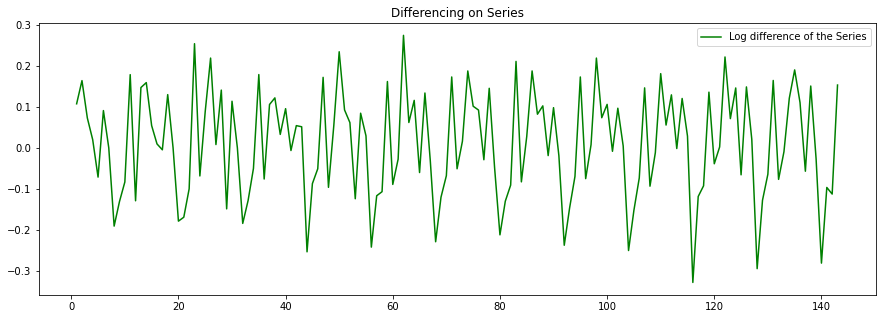

The First Five Records Using Differencing Method: 
 1    0.107486
2    0.164110
3    0.072949
4    0.019901
5   -0.071459
Name: Sales, dtype: float64
The Last Five Records Using Differencing Method: 
 139   -0.026761
140   -0.281412
141   -0.096717
142   -0.112847
143    0.153325
Name: Sales, dtype: float64


In [27]:
# Differencing on series :

sales_log_diff = sales_logdata - sales_logdata.shift()
print("The First Five Records Using Differencing Method: \n", sales_log_diff.head())
print("The Last Five Records Using Differencing Method: \n", sales_log_diff.tail())

# Plotting the chart :

plt.figure(figsize = (15,5))
ax = plt.axes()
plt.plot(sales_log_diff, color = 'g', label = 'Log difference of the Series')
plt.legend(loc = 'best')
plt.title("Differencing on Series")
plt.show()

# Dropping the Null :
sales_log_diff.dropna(inplace = True)
print("The First Five Records Using Differencing Method: \n", sales_log_diff.head())
print("The Last Five Records Using Differencing Method: \n", sales_log_diff.tail())

The value of ADF Statistic is : -2.680467
The p-value is : 0.077480
Critical Values for different level of significance are :
	1% : -3.483
	5% : -2.884
	10% : -2.579


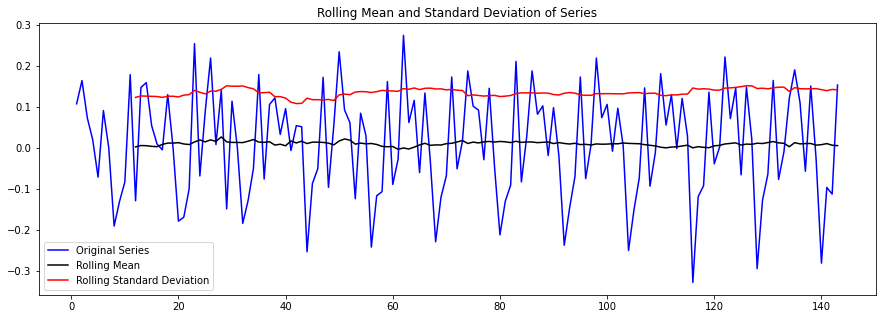

In [28]:
# Calling the funcion for ADF test :

time_func(sales_log_diff)

As the p-Value = 0.07, we can infer that the time series can be considered stationary at 10% level of significance. We can consider second or third order differences for producing better results in specific applications. So we need to go for the second order difference next.

The First Five Records Using Differencing Method: 
 1         NaN
2    0.056624
3   -0.091161
4   -0.053048
5   -0.091360
Name: Sales, dtype: float64
The Last Five Records Using Differencing Method: 
 139   -0.177664
140   -0.254651
141    0.184695
142   -0.016129
143    0.266171
Name: Sales, dtype: float64


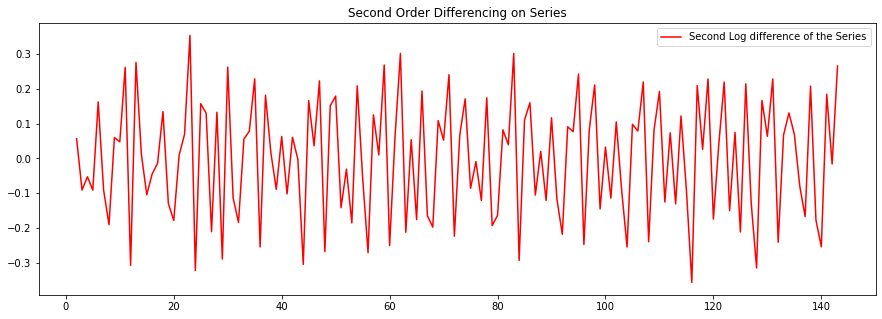

The First Five Records Using Differencing Method: 
 2    0.056624
3   -0.091161
4   -0.053048
5   -0.091360
6    0.162431
Name: Sales, dtype: float64
The Last Five Records Using Differencing Method: 
 139   -0.177664
140   -0.254651
141    0.184695
142   -0.016129
143    0.266171
Name: Sales, dtype: float64


In [29]:
sales_log_diff2 = sales_log_diff - sales_log_diff.shift()
print("The First Five Records Using Differencing Method: \n", sales_log_diff2.head())
print("The Last Five Records Using Differencing Method: \n", sales_log_diff2.tail())

# Plotting the chart :

plt.figure(figsize = (15,5))
ax = plt.axes()
plt.plot(sales_log_diff2, color = 'r', label = 'Second Log difference of the Series')
plt.legend(loc = 'best')
plt.title("Second Order Differencing on Series")
plt.show()

# Dropping the Null :
sales_log_diff2.dropna(inplace = True)
print("The First Five Records Using Differencing Method: \n", sales_log_diff2.head())
print("The Last Five Records Using Differencing Method: \n", sales_log_diff2.tail())

The value of ADF Statistic is : -8.284689
The p-value is : 0.000000
Critical Values for different level of significance are :
	1% : -3.483
	5% : -2.884
	10% : -2.579


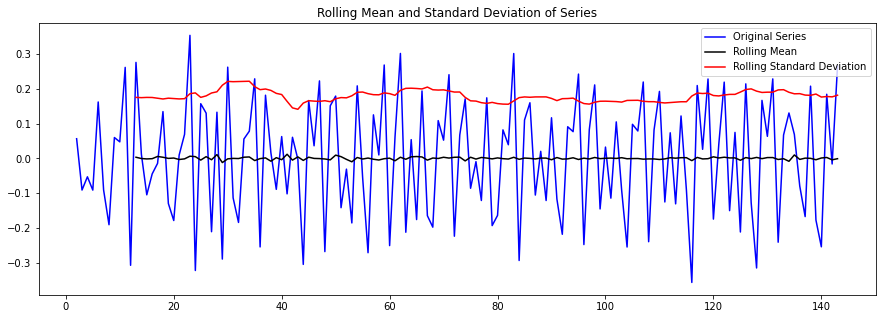

In [30]:
# Calling the funcion for ADF test :

time_func(sales_log_diff2)

After the Second Order Differencing we notice that the series has become stationary since in the ADF test, p-value < 0.05, that is, we reject H0 which is assumed that the series is non-stationary.

Still as the first order differencing provides a stationarity at 10% level of significance, we can experiment with first order and second order both and will use which ever is best based on RSS value of ARIMA.

#### **Seasonal Decomposition** :

- Seasonal decomposition helps in modeling both trend and seasonality. Time series data have a seasonal component in data such as monthly, quarterly or yearly which can be divided into trend, seasonal or irregular components. **The trend component displays changes that happen over time**. **The seasonal component displays the cyclical effects due to the time of year**.

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition = seasonal_decompose(sales_logdata, period = 12)
#sales_decomposition = sales_decompose.to_frame()
sales_trend = sales_decomposition.trend
sales_seasonal = sales_decomposition.seasonal
sales_residual = sales_decomposition.resid

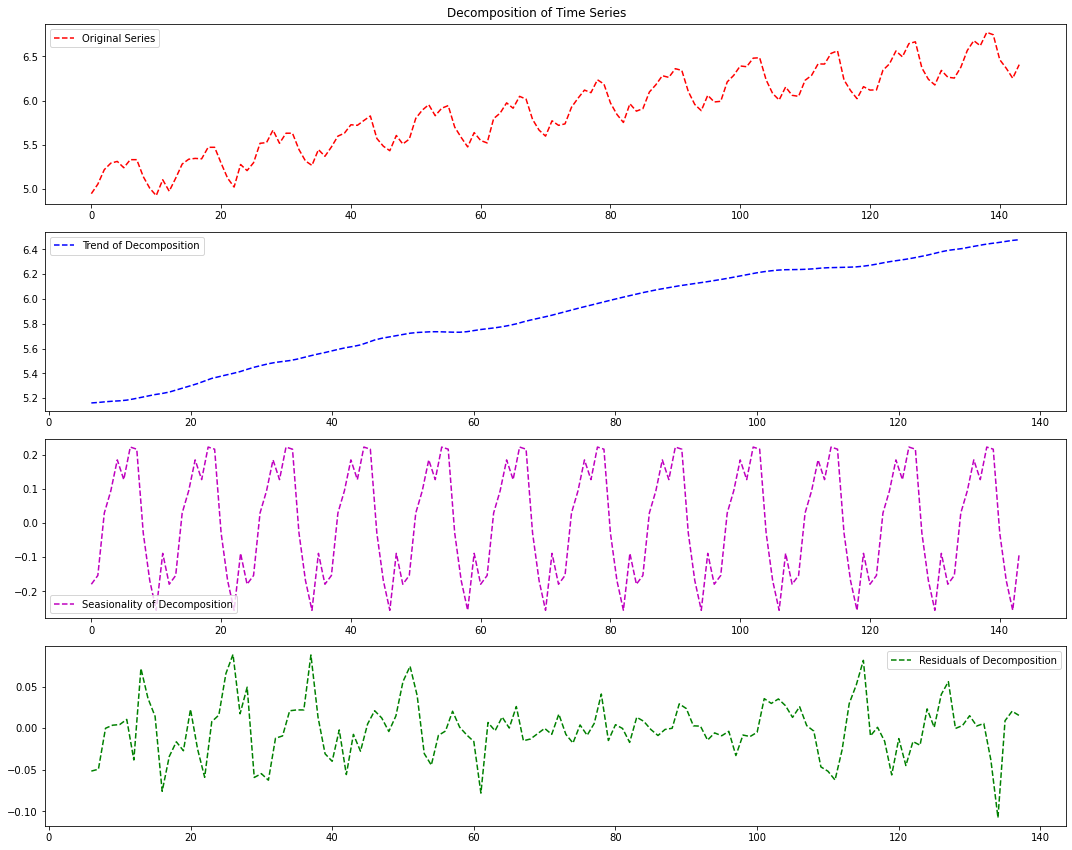

In [32]:
# Creating Plot :

plt.figure(figsize = (15,12))
plt.suptitle("Decomposition of Time Series")
plt.subplot(4,1,1)
plt.plot(sales_logdata, 'r--', label = "Original Series")
#plt.grid()
plt.legend()

plt.subplot(4,1,2)
plt.plot(sales_trend, 'b--', label = "Trend of Decomposition")
#plt.grid()
plt.legend()

plt.subplot(4,1,3)
plt.plot(sales_seasonal, 'm--', label = "Seasionality of Decomposition")
#plt.grid()
plt.legend()

plt.subplot(4,1,4)
plt.plot(sales_residual, 'g--', label = "Residuals of Decomposition")
#plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

We now check the stationarity after handling the misiing values.

In [33]:
# Handling missing values :
sales_logdata_decompose = sales_residual
sales_logdata_decompose.dropna(inplace = True)

In [34]:
# Calling the funcion for ADF test :

def seasonal_func(series):
    # Applying Dickey-Fuller Test:
    from statsmodels.tsa.stattools import adfuller
    salesvalues = series.values
    
    # H0 : The time series is non-stationary:
    result = adfuller(salesvalues)
    print("The value of ADF Statistic is : %f" % result[0])
    print("The p-value is : %f" % result[1])
    print("Critical Values for different level of significance are :")
    for key, value in result[4].items():
        print('\t%s : %.3f' % (key, value))
    
    # Converting series to data frame:
    sales_data = series.to_frame()

seasonal_func(sales_logdata_decompose)

The value of ADF Statistic is : -6.330971
The p-value is : 0.000000
Critical Values for different level of significance are :
	1% : -3.485
	5% : -2.886
	10% : -2.580


The ADF statistic is significantly lower than the 1% critical value. Thus we can say that the series is stationary.

### P & Q Values (Lag) Determination for AR(P), MA(Q) :
---

- We use PACF for the determination of the order or the lag value of AR(P) process.
- For MA(Q) process we use ACF to determine the lag value or the order of the MA process. 
- We find optimum features or order of the AR process using the PACF plot, as it removes variations explained by earlier lags so we get only the relevant features.

- We find optimum features or order of the MA process using the ACF plot, as being an MA process it doesn’t have seasonal and trend components so we get only the residual relationship with the lags of time series in the ACF plot. ACF acting as a partial plot.

##### **Determination of P Value of AR(P) Using PACF** :

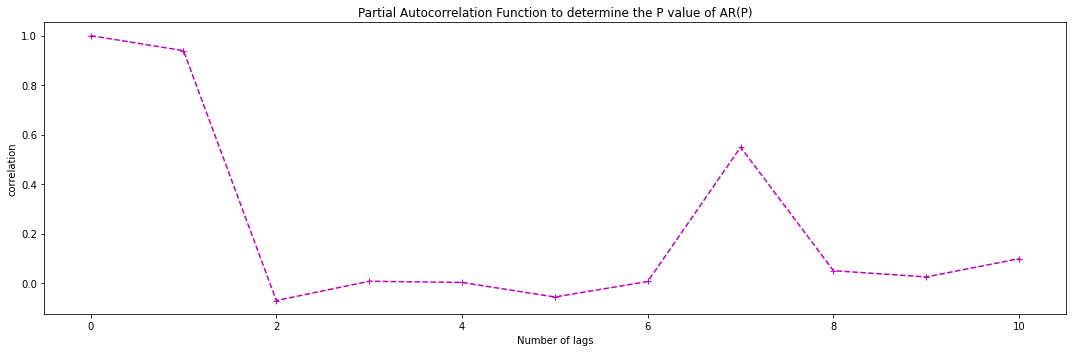

In [35]:
from statsmodels.tsa.stattools import pacf
sales_pacf = pacf(sales_logdata, nlags = 10, method = 'ywm')
plt.figure(figsize=(15, 5))
plt.plot(sales_pacf, "m--" ,marker='+')
plt.title('Partial Autocorrelation Function to determine the P value of AR(P)')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plt.show()

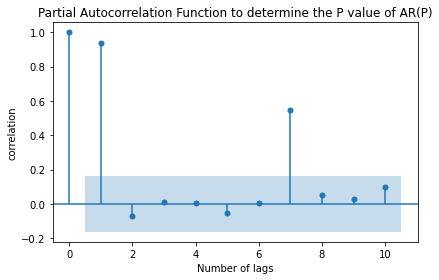

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
sales_pacf_plot = plot_pacf(sales_logdata, lags = 10, method = 'ywm')
plt.title('Partial Autocorrelation Function to determine the P value of AR(P)')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plt.show()

Note :
- Both the feagure shows that the optimal lag should be 2.
- Beyond 2 the PACF increases.
- Before the value 2 PACF is higher.
- So the process is merging to 0 at a lag value of 2

##### **Determination of Q Value of MA(Q) Using ACF** :

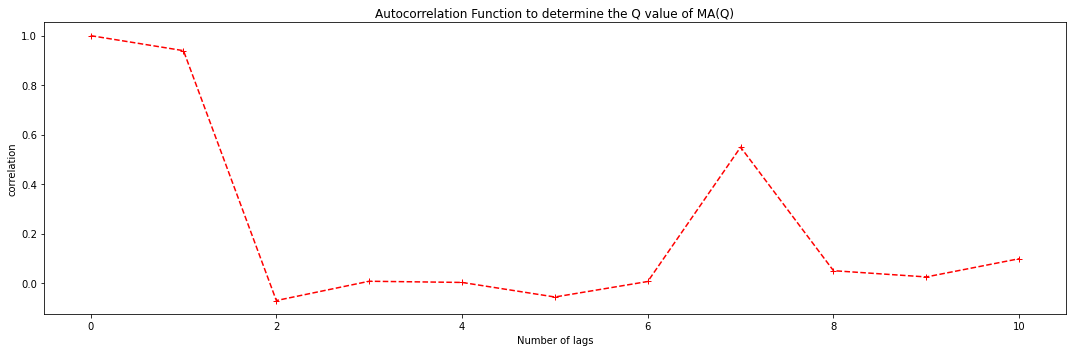

In [37]:
from statsmodels.tsa.stattools import acf
sales_acf = acf(sales_logdata, nlags = 10, fft = False)
plt.figure(figsize=(15, 5))
plt.plot(sales_pacf, "r--" ,marker='+')
plt.title('Autocorrelation Function to determine the Q value of MA(Q)')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plt.show()

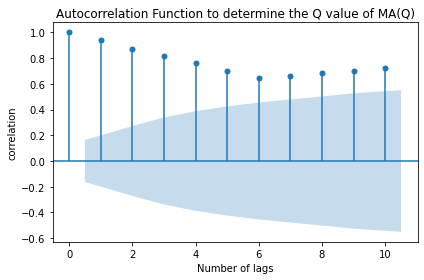

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
sales_acf_plot = plot_acf(sales_logdata, lags = 10)
plt.title('Autocorrelation Function to determine the Q value of MA(Q)')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plt.show()

Note :
- As per above plot we have good correlation upto 2nd lag, this is the lag after which plot cuts the upper confidence interval. Order q of series obtained by the plot is 2

*Note : Therfore we have AR of ordered 2, that is, AR(2) where P = 2 and we also have MA of ordered 2, that is, MA(2) where Q = 2 for the experimental process. Earlier we found that the series will be stationary after the second order differencing at 1% and first order differencing at 10% level of significance. The ultimate model selection will be based on RMSE of the ARIMA Models with different lag values.*
--


### ARIMA Model :
---

**ARIMA(2,1,2) :**

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 125.140
Method:                       css-mle   S.D. of innovations              0.099
Date:                Wed, 16 Nov 2022   AIC                           -238.279
Time:                        16:58:02   BIC                           -220.502
Sample:                             1   HQIC                          -231.055
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0097      0.003      3.164      0.002       0.004       0.016
ar.L1.D.Sales     1.6550      0.034     49.360      0.000       1.589       1.721
ar.L2.D.Sales    -0.9122      0.034    -

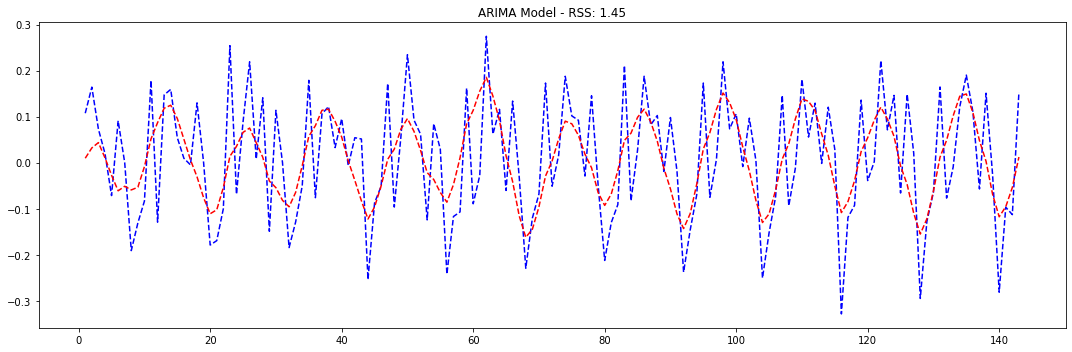

In [39]:
import warnings
warnings.filterwarnings('ignore')


# Creating ARIMA(2,1,2) model :

from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(sales_logdata, order = (2,1,2))
arima_result_1 = arima_model.fit()
print(arima_result_1.summary())

# Visual Representation of ARIMA(2,1,2) model :

plt.figure(figsize=(15, 5))
plt.plot(sales_log_diff, "b--")
plt.plot(arima_result_1.fittedvalues, "r--")
plt.title('ARIMA Model - RSS: %.2f'% sum((arima_result_1.fittedvalues - sales_log_diff)**2))
plt.tight_layout()
plt.show()

**ARIMA(2,2,2) :**

                             ARIMA Model Results                              
Dep. Variable:               D2.Sales   No. Observations:                  142
Model:                 ARIMA(2, 2, 2)   Log Likelihood                  99.640
Method:                       css-mle   S.D. of innovations              0.114
Date:                Wed, 16 Nov 2022   AIC                           -187.279
Time:                        16:58:04   BIC                           -169.545
Sample:                             2   HQIC                          -180.073
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.724e-05   3.32e-05     -1.423      0.155      -0.000    1.78e-05
ar.L1.D2.Sales     0.9425      0.080     11.786      0.000       0.786       1.099
ar.L2.D2.Sales    -0.3066      0.080

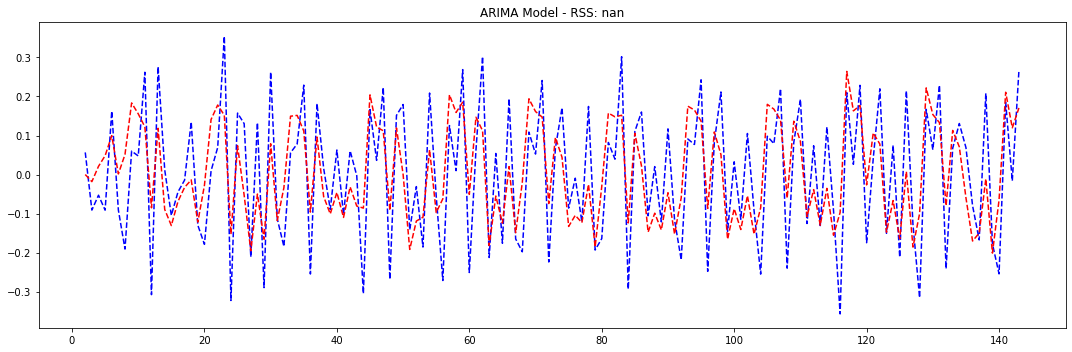

In [40]:
import warnings
warnings.filterwarnings('ignore')

# Creating ARIMA(2,2,2) model :

from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(sales_logdata, order = (2,2,2))
arima_result_0 = arima_model.fit()
print(arima_result_0.summary())

# Visual Representation of ARIMA(2,2,2) model :

plt.figure(figsize=(15, 5))
plt.plot(sales_log_diff2, "b--")
plt.plot(arima_result_0.fittedvalues, "r--")
plt.title('ARIMA Model - RSS: %.2f'% sum((arima_result_0.fittedvalues - sales_log_diff)**2))
plt.tight_layout()
plt.show()

**ARIMA(2,2,0) :**

                             ARIMA Model Results                              
Dep. Variable:               D2.Sales   No. Observations:                  142
Model:                 ARIMA(2, 2, 0)   Log Likelihood                  68.197
Method:                       css-mle   S.D. of innovations              0.149
Date:                Wed, 16 Nov 2022   AIC                           -128.395
Time:                        16:58:04   BIC                           -116.572
Sample:                             2   HQIC                          -123.590
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0006      0.007     -0.085      0.932      -0.014       0.013
ar.L1.D2.Sales    -0.5327      0.081     -6.588      0.000      -0.691      -0.374
ar.L2.D2.Sales    -0.2891      0.081

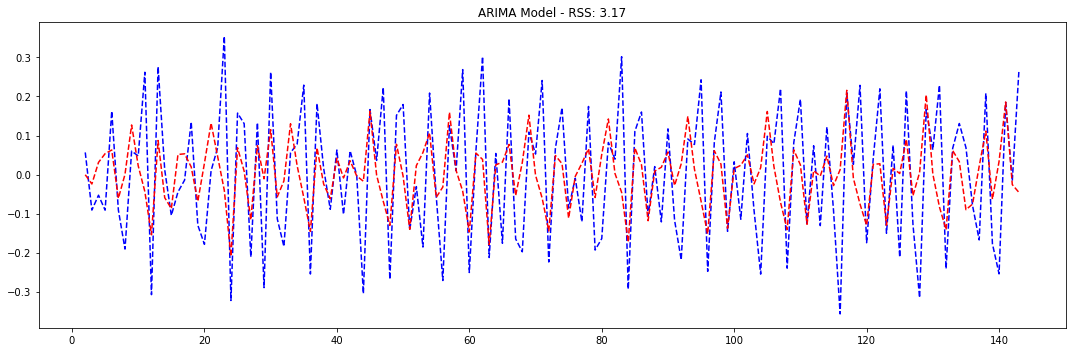

In [41]:
import warnings
warnings.filterwarnings('ignore')


# Creating ARIMA(2,2,0) model :

from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(sales_logdata, order = (2,2,0))
arima_result_2 = arima_model.fit()
print(arima_result_2.summary())

# Visual Representation of ARIMA(2,2,0) model :

plt.figure(figsize=(15, 5))
plt.plot(sales_log_diff2, "b--")
plt.plot(arima_result_2.fittedvalues, "r--")
plt.title('ARIMA Model - RSS: %.2f'% sum((arima_result_2.fittedvalues - sales_log_diff2)**2))
plt.tight_layout()
plt.show()

**Note : ARIMA(2,1,2) gives the best RSS values and hence can be considered for the forecasting purpose. But we shall experiment with ARIMA(2,2,0) as well.**

### Forecasting :
---

**1. For ARIMA(2,1,2) :**

In [42]:
# Predicting Values :

predictions = pd.Series(arima_result_1.fittedvalues, copy = True)

# Predicting Cumulative Values :

predictions_cumsum = predictions.cumsum()

In [43]:
# Predicting the values :

predictions_log = pd.Series(sales_logdata, index = sales_logdata.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value = 0)

# Forecasting the series :

predictions_ARIMA = np.exp(predictions_log)
print(predictions_ARIMA.head())

0    141.000000
1    158.525970
2    192.881330
3    216.730053
4    223.419427
dtype: float64


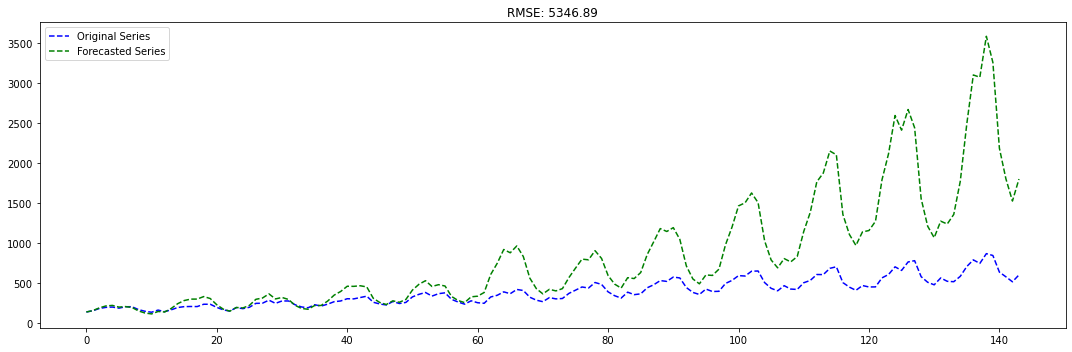

In [44]:
# Creating the chart with ARIMA(2,1,2):
plt.figure(figsize=(15, 5))
plt.plot(sales.Sales, "b--",  label = "Original Series")
plt.plot(predictions_ARIMA, "g--", label = "Forecasted Series")
plt.title("RMSE: %.2f"% np.sqrt(sum(predictions_ARIMA - sales.Sales)**2/len(sales.Sales)))
plt.legend()
plt.tight_layout()
plt.show()

**2. For ARIMA(2,2,2) :**

In [45]:
# Predicting Values :

predictions = pd.Series(arima_result_0.fittedvalues, copy = True)

# Predicting Cumulative Values :

predictions_cumsum = predictions.cumsum()

In [46]:
# Predicting the values :

predictions_log = pd.Series(sales_logdata, index = sales_logdata.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value = 0)

# Forecasting the series :

predictions_ARIMA = np.exp(predictions_log)
print(predictions_ARIMA.head())

0    141.000000
1    157.000000
2    184.991260
3    195.396783
4    203.559611
dtype: float64


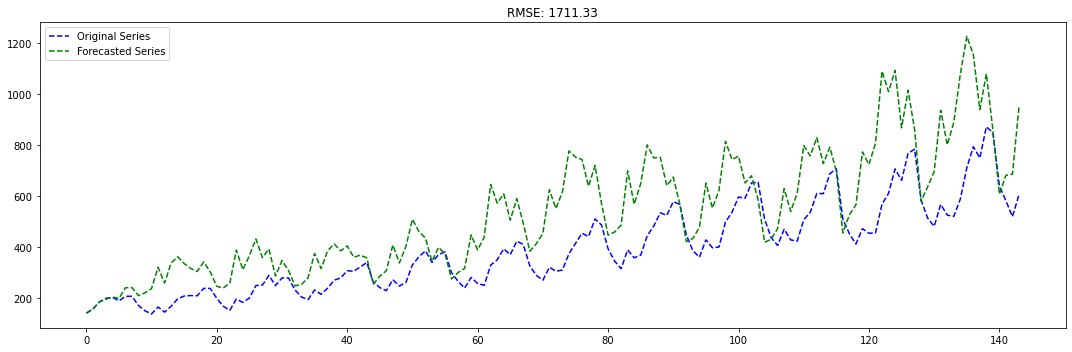

In [47]:
# Creating the chart with ARIMA(2,2,2):
plt.figure(figsize=(15, 5))
plt.plot(sales.Sales, "b--",  label = "Original Series")
plt.plot(predictions_ARIMA, "g--", label = "Forecasted Series")
plt.title("RMSE: %.2f"% np.sqrt(sum(predictions_ARIMA - sales.Sales)**2/len(sales.Sales)))
plt.legend()
plt.tight_layout()
plt.show()

**3. For ARIMA(2,2,0) :**

In [48]:
# Predicting Values :

predictions = pd.Series(arima_result_2.fittedvalues, copy = True)

# Predicting Cumulative Values :

predictions_cumsum = predictions.cumsum()

For forecasting the model, we should take the exponent of the series from the above predicted values.

In [49]:
# Predicting the values :

predictions_log = pd.Series(sales_logdata, index = sales_logdata.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value = 0)

# Forecasting the series :

predictions_ARIMA = np.exp(predictions_log)
print(predictions_ARIMA.head())

0    141.000000
1    157.000000
2    184.891291
3    194.121572
4    204.284331
dtype: float64


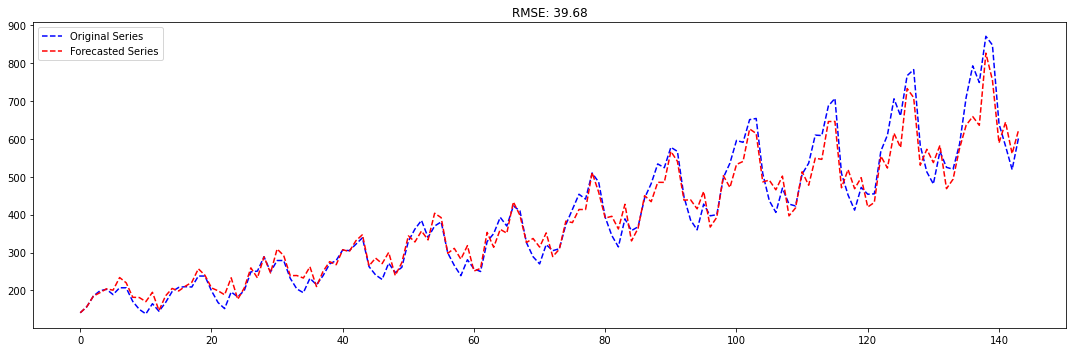

In [50]:
# Creating the chart with ARIMA(2,2,0):
plt.figure(figsize=(15, 5))
plt.plot(sales.Sales, "b--",  label = "Original Series")
plt.plot(predictions_ARIMA, "r--", label = "Forecasted Series")
plt.title("RMSE: %.2f"% np.sqrt(sum(predictions_ARIMA - sales.Sales)**2/len(sales.Sales)))
plt.legend()
plt.tight_layout()
plt.show()

### Findings & Interpretation :
---

- *Though we find out that optimal lag range for AR model is 2 and MA model is also 2 with 2nd order differerncing in reality it is not since the RMSE value for ARIMA(2,2,2) is 1712 apprimately and therefore this model can not be accepted.*

- *Secondly, the first order differencing with optimal lag ranges also have high RMSE about 5347 approximately for ARIMA(2,1,2) model. Therefore this model also can not be accepted.*

- *Thirdly, the model with second order differencing and lag range of 2 for AR & 0 for MA gives a satisfactory RMSE about 39.7. Therefore this can be treated as a AR(2) model with second order differencing and can also be accepted for the forecasting purpose.*

- *Lastly, though the RSS for the AR(2) model is not best compared to the others, we can take this model since it might provide some cosistent forecasting comapred to others.*

**In a conclusion, we can take the ARIMA(2,2,0) as our best model.**

### Forecasting with ARIMA(2,2,0) model :
---

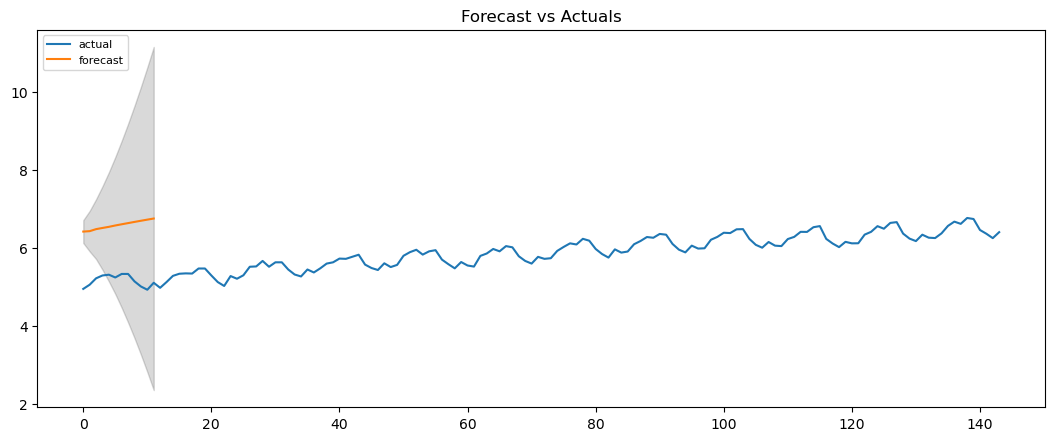

In [51]:
fc, se, conf = arima_result_2.forecast(12, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc)
lower_series = pd.Series(conf[:, 0])
upper_series = pd.Series(conf[:, 1])

# Plot
plt.figure(figsize=(13,5), dpi=100)
plt.plot(sales_logdata, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index,upper_series, lower_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Forecasted Values :
---

In [52]:
fc_series = np.exp(fc_series)

In [53]:
print("The forecasted values of sales for 12 months after 2014-12-03 are : \n", round(fc_series),2)

The forecasted values of sales for 12 months after 2014-12-03 are : 
 0     614.0
1     621.0
2     654.0
3     674.0
4     694.0
5     718.0
6     741.0
7     763.0
8     787.0
9     811.0
10    835.0
11    859.0
dtype: float64 2


In [54]:
sales

,Month_Year,Sales
0,2003-01-03,141
1,2003-02-03,157
2,2003-03-03,185
3,2003-04-03,199
4,2003-05-03,203
...,...,...
139,2014-08-03,848
140,2014-09-03,640
141,2014-10-03,581
142,2014-11-03,519


In [55]:
df_Forecasted = pd.DataFrame(fc_series.round(0), columns = ['Forecasted_Sales'])

In [56]:
df_Forecasted

,Forecasted_Sales
0,614.0
1,621.0
2,654.0
3,674.0
4,694.0
5,718.0
6,741.0
7,763.0
8,787.0
9,811.0


### Merging Actual Sales given in the Dataset and the Forecasted Sales :
---

In [57]:
l1 = list(sales.Sales)

In [58]:
l2 = list(df_Forecasted.Forecasted_Sales)

In [59]:
l1.extend(l2)

In [60]:
# print(l1)

In [61]:
Actual_Forecasted_Sales = pd.DataFrame(l1, columns = ['Actual_Forecasted_Sales'])
print(Actual_Forecasted_Sales.tail(20))

     Actual_Forecasted_Sales
136                    793.0
137                    749.0
138                    871.0
139                    848.0
140                    640.0
141                    581.0
142                    519.0
143                    605.0
144                    614.0
145                    621.0
146                    654.0
147                    674.0
148                    694.0
149                    718.0
150                    741.0
151                    763.0
152                    787.0
153                    811.0
154                    835.0
155                    859.0


In [62]:
l5 = sales['Month_Year'].astype(str)

In [63]:
l6 = list(l5)

In [64]:
l7 = ['2015-01-30','2015-02-03','2015-03-03','2015-04-03','2015-05-03','2015-06-03','2015-07-03','2015-08-03','2015-09-03','2015-10-03','2015-11-03','2015-12-03']

In [65]:
l6.extend(l7)

In [66]:
#l6

In [67]:
Actual_Forecasted_years = pd.DataFrame(l6, columns = ['Actual_Forecasted_Years'])
Actual_Forecasted_years.tail(12)

,Actual_Forecasted_Years
144,2015-01-30
145,2015-02-03
146,2015-03-03
147,2015-04-03
148,2015-05-03
149,2015-06-03
150,2015-07-03
151,2015-08-03
152,2015-09-03
153,2015-10-03


### Creating the Entire Result :
---

In [68]:
df = pd.concat([Actual_Forecasted_years, Actual_Forecasted_Sales], axis=1)
df

,Actual_Forecasted_Years,Actual_Forecasted_Sales
0,2003-01-03,141.0
1,2003-02-03,157.0
2,2003-03-03,185.0
3,2003-04-03,199.0
4,2003-05-03,203.0
...,...,...
151,2015-08-03,763.0
152,2015-09-03,787.0
153,2015-10-03,811.0
154,2015-11-03,835.0


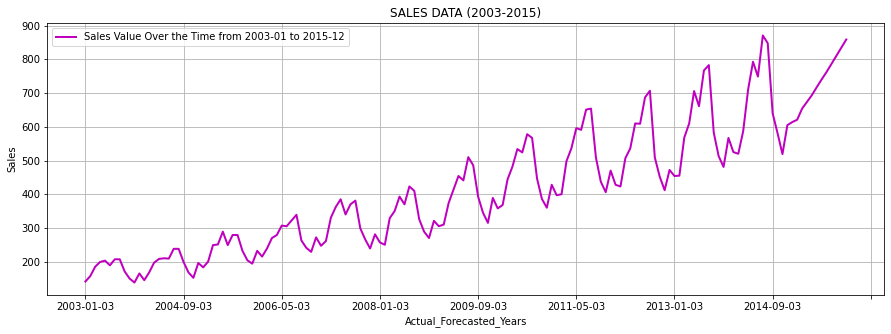

In [75]:
### Plotting the Result :
df.plot(x = 'Actual_Forecasted_Years', y ='Actual_Forecasted_Sales', label = 'Sales Value Over the Time from 2003-01 to 2015-12', color = 'm', linewidth = 2, figsize = (15,5), grid = True)
plt.ylabel('Sales')
plt.legend(loc = 'upper left')
plt.title('SALES DATA (2003-2015)')
plt.show()

### Exporting the Result into Excel :
---

In [72]:
df.to_csv('Actual_Forecasted_Sales.csv',index = False)

                                                **THE END**